In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classes/Classes.jpg
/kaggle/input/indian-corrected-mat/Indian_pines_corrected.mat
/kaggle/input/indian-corrected-mat/Indian_pines_gt.mat
/kaggle/input/indian-pines-hyperspectral-dataset/indianpinearray.npy
/kaggle/input/indian-pines-hyperspectral-dataset/IPgt.npy


In [6]:


!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"



!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"   

--2024-10-23 03:14:51--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat [following]
--2024-10-23 03:14:51--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: 'Indian_pines_corrected.mat'

Indian_pines_correc 100%[===================>]   5.68M  2.18MB/s    in 2.6s    

2024-10-23 03:14:54 (2.18 MB/s) - 'Indian_pines_corrected.mat' saved [5953527/5953527]

URL transformed to HTTPS due to an HSTS policy
--2024-10-23 03:14:55--  https://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.e

In [7]:
!ls

Indian_pines_corrected.mat  Indian_pines_gt.mat


In [8]:
from scipy.io import loadmat

In [9]:
## Read the data.

dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [10]:
#The dimensions of the data.

print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


In [11]:
import numpy as np

import matplotlib.pyplot as plt



def plot_band(dataset):

    plt.figure(figsize=(8, 6))

    band_no = np.random.randint(dataset.shape[2])

    plt.imshow(dataset[:,:, band_no], cmap='jet')

    plt.title(f'Band-{band_no}', fontsize=14)

    plt.axis('off')

    plt.colorbar()

    plt.show()

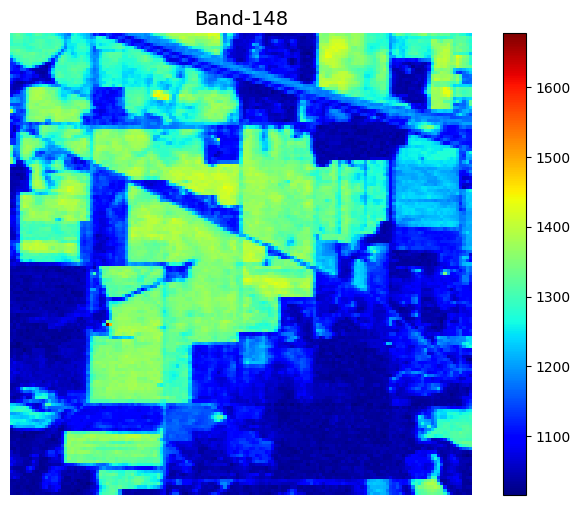

In [12]:
plot_band(dataset)


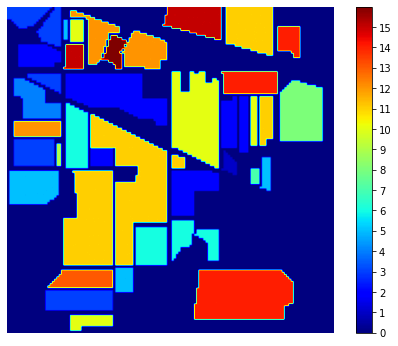

In [25]:
plt.figure(figsize=(8, 6))

plt.imshow(ground_truth, cmap='jet')

plt.axis('off')

plt.colorbar(ticks= range(0,16))

plt.show()


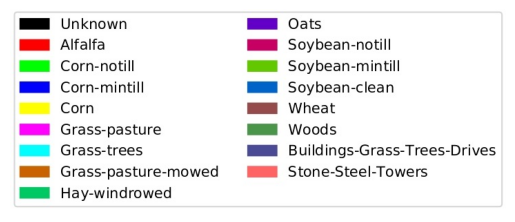

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = '/kaggle/input/classes/Classes.jpg'
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [26]:
from tqdm import tqdm

In [27]:
dataset[:,:,2].ravel().shape

(21025,)

In [28]:
ser = pd.Series(dataset[0][0])

In [29]:
ser

0      3172
1      4142
2      4506
3      4279
4      4782
       ... 
195    1062
196    1069
197    1057
198    1020
199    1020
Length: 200, dtype: uint16

In [30]:
df_temp = pd.DataFrame()

temp = pd.Series([1,3])

df_temp = pd.concat([temp,ser])

In [31]:
df_temp

0         1
1         3
0      3172
1      4142
2      4506
       ... 
195    1062
196    1069
197    1057
198    1020
199    1020
Length: 202, dtype: int64

In [32]:
pd.DataFrame(dataset[0,0])

,0
0,3172
1,4142
2,4506
3,4279
4,4782
...,...
195,1062
196,1069
197,1057
198,1020


In [33]:
df_new = pd.DataFrame()

for i in tqdm(range(dataset.shape[0])):

    for j in range(dataset.shape[1]):

        df_new=pd.concat([df_new,pd.Series([i,j]),pd.Series(dataset[i,j])],axis=0)

            

100%|██████████| 145/145 [04:19<00:00,  1.79s/it]


In [34]:
row_list = []

for i in range(0,145):

    for j in range(0,145):

        row_list.append(i)

        

col_list = []

for i in range(0,145):

    for j in range(0,145):

        col_list.append(j)

        

row_series = pd.Series(row_list)

col_series = pd.Series(col_list)

In [35]:
row_series

0          0
1          0
2          0
3          0
4          0
        ... 
21020    144
21021    144
21022    144
21023    144
21024    144
Length: 21025, dtype: int64

In [36]:
dataset[:,:,0].shape

(145, 145)

In [37]:
from tqdm import tqdm

import pandas as pd

def extract_pixels(dataset, ground_truth):

    df = pd.DataFrame()

    df = pd.concat([df,row_series,col_series],axis=1)

    for i in tqdm(range(dataset.shape[2])):

        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)

    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)

    df.columns = ['pixel_row', 'pixel_col']+[f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']

    return df

In [38]:
df = extract_pixels(dataset, ground_truth)


100%|██████████| 200/200 [00:02<00:00, 89.48it/s]


In [39]:
df.head()

,pixel_row,pixel_col,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,0,0,3172,4142,4506,4279,4782,5048,5213,5106,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,0,1,2580,4266,4502,4426,4853,5249,5352,5353,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,0,2,3687,4266,4421,4498,5019,5293,5438,5427,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,0,3,2749,4258,4603,4493,4958,5234,5417,5355,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,0,4,2746,4018,4675,4417,4886,5117,5215,5096,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [40]:
df.shape

(21025, 203)

In [41]:
df.to_csv('Dataset.csv', index=False)

In [42]:
df.iloc[:,2]

0        3172
1        2580
2        3687
3        2749
4        2746
         ... 
21020    2561
21021    2726
21022    3153
21023    3155
21024    3323
Name: band-1, Length: 21025, dtype: uint16

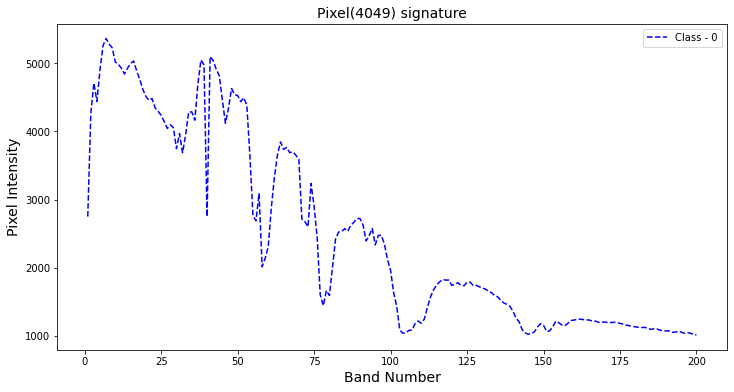

In [43]:
def plot_signature(df):

    plt.figure(figsize=(12, 6))

    pixel_no = np.random.randint(df.shape[0])

    plt.plot(range(1, 201), df.iloc[pixel_no, 2:-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')

    plt.legend()

    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)

    plt.xlabel('Band Number', fontsize=14)

    plt.ylabel('Pixel Intensity', fontsize=14)

    plt.show()

    

plot_signature(df)

In [163]:
df['class']

0        3
1        3
2        3
3        3
4        3
        ..
21020    0
21021    0
21022    0
21023    0
21024    0
Name: class, Length: 21025, dtype: int64

In [44]:
df.loc[:,'class'].unique()

array([ 3,  0, 15, 11, 12,  5, 10, 14, 16,  2,  4,  8,  6,  9,  1,  7, 13],
      dtype=uint8)

In [45]:
df.loc[:, 'class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

In [164]:
num_classes = df['class'].nunique()



unique_classes = df['class'].unique()



print(f"Number of unique classes: {num_classes}")



print(f"Unique classes: {unique_classes}")


Number of unique classes: 17
Unique classes: [ 3  0 15 11 12  5 10 14 16  2  4  8  6  9  1  7 13]


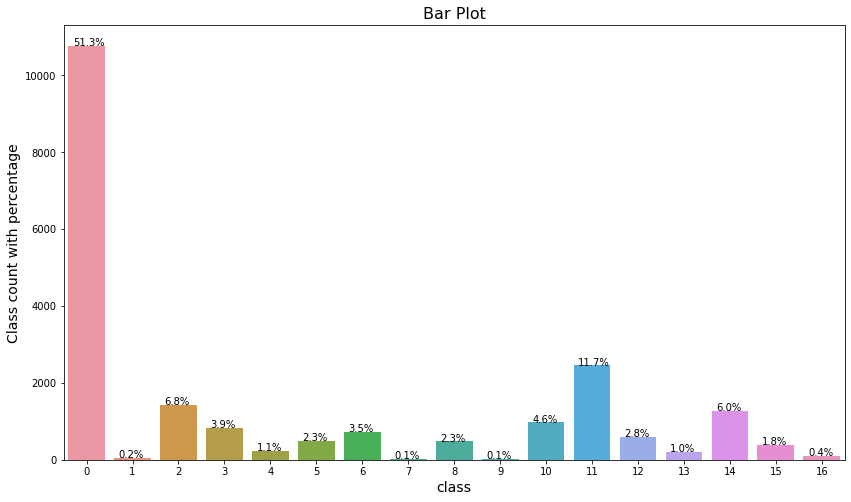

In [46]:
import seaborn as sns



plt.figure(figsize=(14, 8))



ax = sns.countplot(x='class', data=df[['class']])



for p in ax.patches:

        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))



plt.ylabel('Class count with percentage', fontsize=14)



plt.xlabel('class', fontsize=14)



plt.title('Bar Plot', fontsize=16)



plt.show()

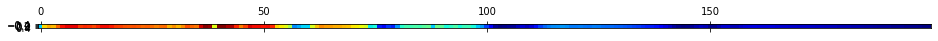

In [47]:
# Visualizing the pixel

plt.matshow(df.iloc[1, 2:-1].values.reshape(1,200), cmap='jet');

In [48]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_pixel(pixel, n):

    ax = plt.gca()

    im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')

    plt.title(f'pixel - {n}')

    plt.axis('off')

    divider = make_axes_locatable(ax)

    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)

    plt.show()

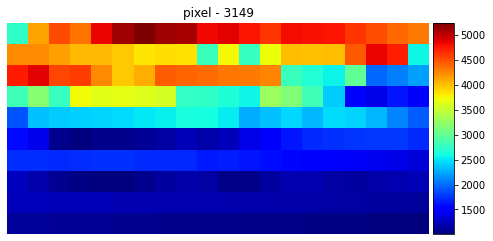

In [49]:
plt.figure(figsize=(8, 4))



rand_n = np.random.randint(df.shape[0])



plot_pixel(df.iloc[rand_n, 2:-1].values, rand_n)

In [50]:
type(df['band-1'])

pandas.core.series.Series

Enter the band Number(1-200):  90


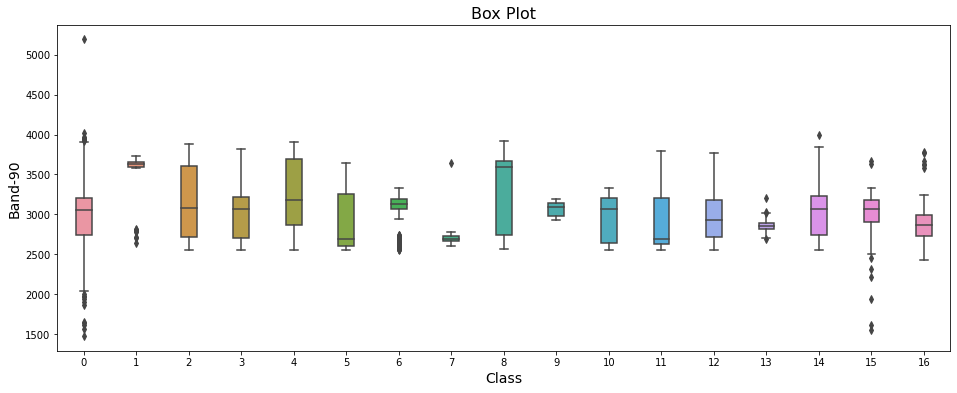

In [51]:


plt.figure(figsize=(16, 6))

n = int(input('Enter the band Number(1-200): ').strip())  # Using strip() to remove any extra spaces

sns.boxplot(x=df["class"], y=df[f'band-{n}'], width=0.3)

plt.title('Box Plot', fontsize=16)

plt.xlabel('Class', fontsize=14)

plt.ylabel(f'Band-{n}', fontsize=14)

plt.show()


PCA+SVM

In [52]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import seaborn as sns

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [53]:
df = pd.read_csv('Dataset.csv')

In [54]:
df.head()

,pixel_row,pixel_col,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,0,0,3172,4142,4506,4279,4782,5048,5213,5106,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,0,1,2580,4266,4502,4426,4853,5249,5352,5353,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,0,2,3687,4266,4421,4498,5019,5293,5438,5427,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,0,3,2749,4258,4603,4493,4958,5234,5417,5355,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,0,4,2746,4018,4675,4417,4886,5117,5215,5096,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [55]:
X = df.iloc[:, 2:-1].values



y = df.iloc[:, -1].values

In [56]:
X.shape,y.shape

((21025, 200), (21025,))

In [57]:
pca = PCA(n_components=50)

principalComponents = pca.fit_transform(X)

ev = pca.explained_variance_ratio_

In [58]:
ev

array([6.84937994e-01, 2.35313708e-01, 1.49635476e-02, 8.21541515e-03,
       6.95011265e-03, 5.17010703e-03, 3.99681431e-03, 3.62359687e-03,
       3.07127396e-03, 2.93211894e-03, 2.67352983e-03, 2.49230109e-03,
       2.24688362e-03, 1.89388747e-03, 1.69433609e-03, 1.56043467e-03,
       1.53162480e-03, 1.35012976e-03, 1.00139015e-03, 9.24874863e-04,
       8.47883989e-04, 7.64383268e-04, 6.64597186e-04, 6.45674323e-04,
       6.16359540e-04, 5.61408036e-04, 5.43161046e-04, 5.15584939e-04,
       4.21073787e-04, 3.65027938e-04, 3.62709093e-04, 3.53235951e-04,
       3.24036981e-04, 3.13687097e-04, 3.03384573e-04, 2.87725708e-04,
       2.79163065e-04, 2.72715353e-04, 2.62982029e-04, 2.50308563e-04,
       2.46111517e-04, 2.32224285e-04, 2.11355974e-04, 1.94041698e-04,
       1.81860244e-04, 1.70636531e-04, 1.55483119e-04, 1.41171399e-04,
       1.37248811e-04, 1.35426168e-04])

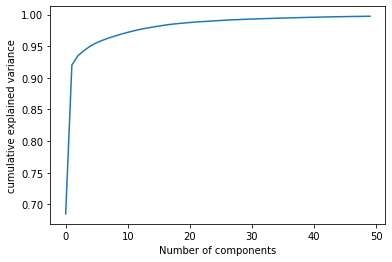

In [59]:
plt.plot(np.cumsum(ev))

plt.xlabel("Number of components")

plt.ylabel("cumulative explained variance")

plt.show()

<AxesSubplot:xlabel='Number of components'>

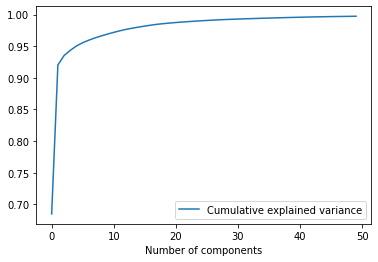

In [60]:
# Interactive plot

df3 = pd.DataFrame(ev, columns=['Cumulative explained variance']).cumsum()

df3['Number of components'] = pd.Series(list(range(50)))

df3.plot(x='Number of components', y='Cumulative explained variance')

In [61]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 

                                                                                  test_size = 0.15)

In [62]:
X_train.shape, X_test.shape


((17871, 50), (3154, 50))

# SVM

In [63]:
svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)

svm.fit(X_train, y_train)

SVC(cache_size=7168, degree=10)

In [64]:
y_pred = svm.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7260621433100825


In [66]:
print("Classification Report: \n", classification_report(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83      1669
           1       0.00      0.00      0.00         8
           2       0.52      0.55      0.53       201
           3       0.91      0.24      0.38       126
           4       1.00      0.07      0.14        41
           5       0.90      0.47      0.62        74
           6       0.82      0.62      0.71        87
           8       0.75      1.00      0.86        67
           9       0.00      0.00      0.00         2
          10       0.61      0.66      0.63       139
          11       0.64      0.80      0.71       372
          12       0.70      0.25      0.37        83
          13       0.92      0.88      0.90        25
          14       0.77      0.25      0.37       199
          15       0.00      0.00      0.00        50
          16       0.59      0.91      0.71        11

    accuracy                           0.73      3154
 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[1498    0   37    2    0    4   10   18    0   23   51    2    2   15
     0    7]
 [   4    0    0    0    0    0    0    4    0    0    0    0    0    0
     0    0]
 [  19    0  111    0    0    0    0    0    0   13   57    1    0    0
     0    0]
 [  35    0   16   30    0    0    0    0    0    1   42    2    0    0
     0    0]
 [  19    0   19    0    3    0    0    0    0    0    0    0    0    0
     0    0]
 [  39    0    0    0    0   35    0    0    0    0    0    0    0    0
     0    0]
 [  33    0    0    0    0    0   54    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0   67    0    0    0    0    0    0
     0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  28    0    2    0    0    0    0    0    0   92   15    2    0    0
     0    0]
 [  40    0   17    0    0    0    0    0    0   15  298    2    0    0
     0    0]
 [  36    0   12    1    0    0    0    0    

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

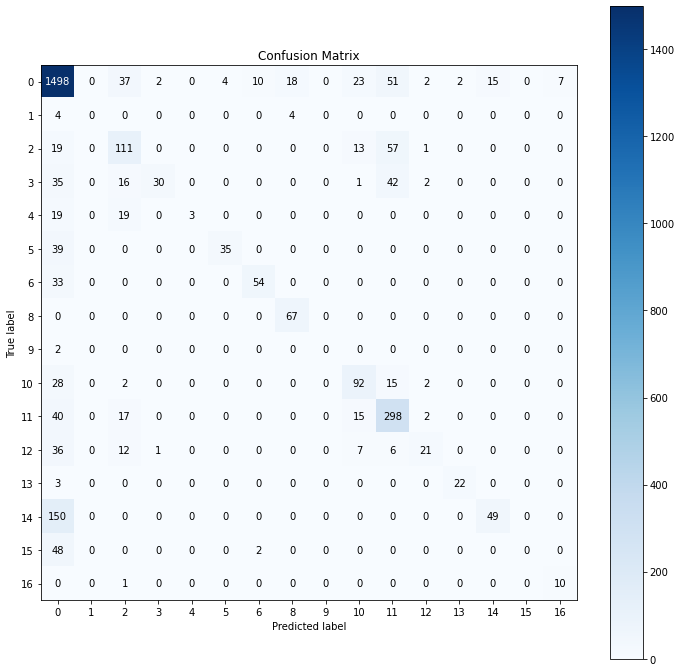

In [68]:
import scikitplot as skplt



skplt.metrics.plot_confusion_matrix(

    y_test,

    y_pred,

    figsize=(12,12))

In [93]:
df.iloc[:,-1].values.reshape((145,145))

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

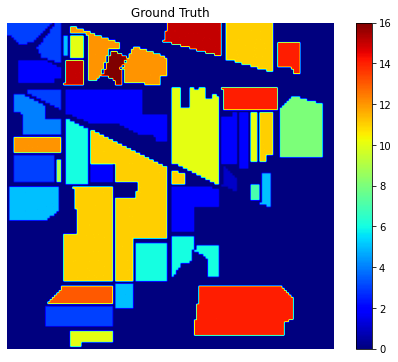

In [94]:
plt.figure(figsize=(8, 6))

plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')

plt.colorbar()

plt.axis('off')

plt.title('Ground Truth')

plt.savefig('ground_truth.png')

plt.show()

In [95]:
len([0]*X.shape[0])

21025

In [96]:
pre = y_pred

clmap = np.zeros((145,145))



for i in tqdm(range(len(indices_train))):

    clmap[df.iloc[indices_train[i], 0]][df.iloc[indices_train[i], 1]] = y[indices_train[i]]

    

for i in tqdm(range(len(indices_test))):

    clmap[df.iloc[indices_test[i], 0]][df.iloc[indices_test[i], 1]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 13301.89it/s]


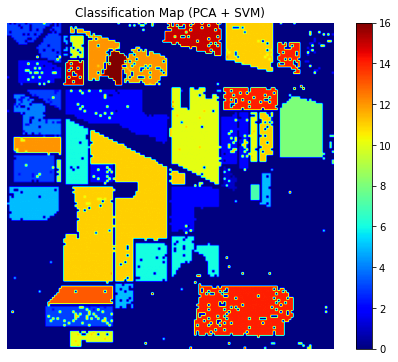

In [97]:
plt.figure(figsize=(8, 6))

plt.imshow(clmap, cmap='jet')

plt.colorbar()

plt.axis('off')

plt.title('Classification Map (PCA + SVM)')

plt.savefig('Classification_map.png')

plt.show()

In [98]:
from tqdm import tqdm

pre = y_pred



clmap = [0]*X.shape[0]



for i in tqdm(range(len(indices_train))):

    clmap[indices_train[i]] = y[indices_train[i]]



for i in tqdm(range(len(indices_test))):

    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 999458.66it/s]


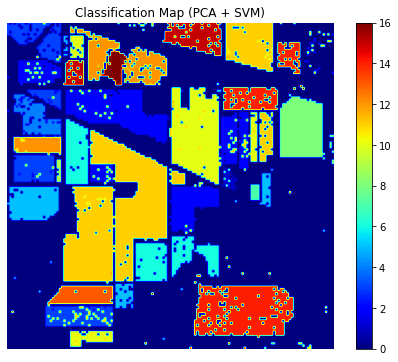

In [99]:
plt.figure(figsize=(8, 6))

plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')

plt.colorbar()

plt.axis('off')

plt.title('Classification Map (PCA + SVM)')

plt.savefig('Classification_map.png')

plt.show()

# **LDA**

In [71]:


# Apply Linear Discriminant Analysis (LDA)

lda = LDA(n_components=None)  # Use all components

X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)

In [72]:


# Train an SVM model on the LDA-transformed data

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_lda, y_train)



# Predict on the test set

y_pred_lda = svm_model.predict(X_test_lda)


In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Evaluate the model

accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("Accuracy: ", accuracy_lda)


Accuracy:  0.7634749524413443


In [74]:
print("Classification Report: \n", classification_report(y_test, y_pred_lda))


Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1669
           1       1.00      0.12      0.22         8
           2       0.57      0.70      0.63       201
           3       0.76      0.48      0.59       126
           4       0.75      0.15      0.24        41
           5       0.90      0.72      0.80        74
           6       0.83      0.80      0.82        87
           8       0.83      1.00      0.91        67
           9       0.00      0.00      0.00         2
          10       0.75      0.70      0.72       139
          11       0.71      0.80      0.75       372
          12       0.71      0.51      0.59        83
          13       0.92      0.92      0.92        25
          14       0.61      0.32      0.42       199
          15       0.00      0.00      0.00        50
          16       0.73      0.73      0.73        11

    accuracy                           0.76      3154
 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [75]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lda))

Confusion Matrix: 
 [[1479    0   44   12    2    6   11   10    0   18   37    7    2   38
     0    3]
 [   3    1    0    0    0    0    0    4    0    0    0    0    0    0
     0    0]
 [  24    0  141    3    0    0    0    0    0    3   28    2    0    0
     0    0]
 [  15    0   12   61    0    0    0    0    0    0   36    2    0    0
     0    0]
 [  14    0   19    0    6    0    0    0    0    0    2    0    0    0
     0    0]
 [  21    0    0    0    0   53    0    0    0    0    0    0    0    0
     0    0]
 [  17    0    0    0    0    0   70    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0   67    0    0    0    0    0    0
     0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  24    0    4    0    0    0    0    0    0   97   12    2    0    0
     0    0]
 [  38    0   23    2    0    0    0    0    0    8  297    4    0    0
     0    0]
 [  28    0    4    2    0    0    0    0    

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

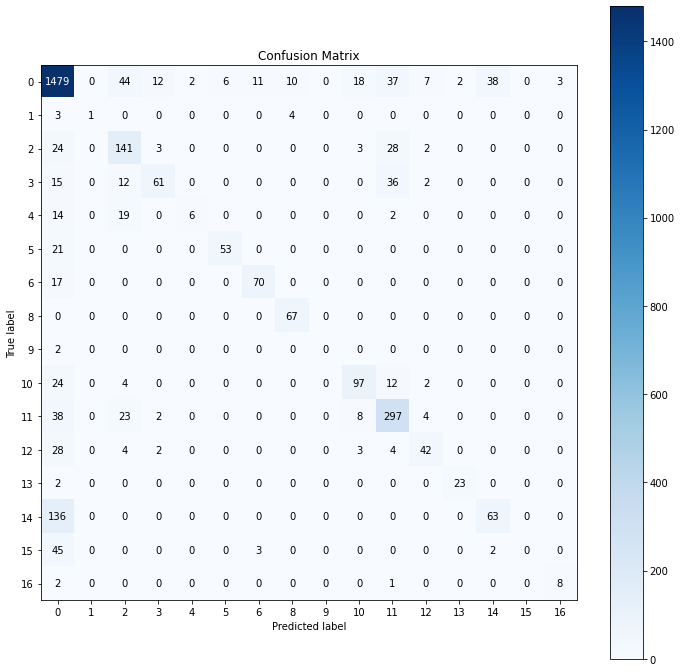

In [76]:
import scikitplot as skplt



skplt.metrics.plot_confusion_matrix(

    y_test,

    y_pred_lda,

    figsize=(12,12))

# **Lda+svm**

In [89]:
pre = y_pred_lda

clmap = np.zeros((145,145))



for i in tqdm(range(len(indices_train))):

    clmap[df.iloc[indices_train[i], 0]][df.iloc[indices_train[i], 1]] = y[indices_train[i]]

    

for i in tqdm(range(len(indices_test))):

    clmap[df.iloc[indices_test[i], 0]][df.iloc[indices_test[i], 1]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 13372.79it/s]


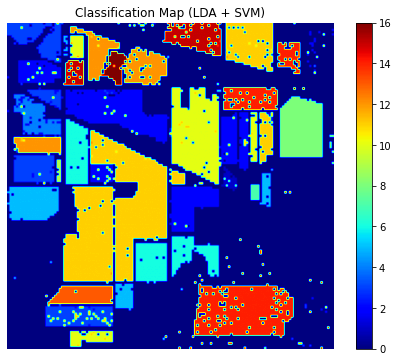

In [90]:
plt.figure(figsize=(8, 6))

plt.imshow(clmap, cmap='jet')

plt.colorbar()

plt.axis('off')

plt.title('Classification Map (LDA + SVM)')

plt.savefig('Classification_map.png')

plt.show()

In [91]:
from tqdm import tqdm

pre = y_pred_lda



clmap = [0]*X.shape[0]



for i in tqdm(range(len(indices_train))):

    clmap[indices_train[i]] = y[indices_train[i]]



for i in tqdm(range(len(indices_test))):

    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 1027881.49it/s]


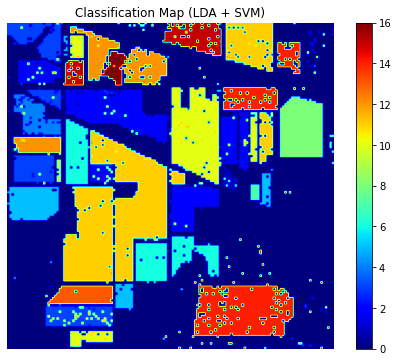

In [92]:
plt.figure(figsize=(8, 6))

plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')

plt.colorbar()

plt.axis('off')

plt.title('Classification Map (LDA + SVM)')

plt.savefig('Classification_map.png')

plt.show()

# Neural Network(MLP)

In [100]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

from tensorflow.keras import regularizers, models, layers

from tensorflow.keras.callbacks import EarlyStopping

In [101]:
X_train.shape

(17871, 50)

In [102]:


model = Sequential()



model.add(Dense(150,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())

model.add(Dropout(0.2))



model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())



model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())

model.add(Dropout(0.3))



model.add(Dense(75,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())



model.add(Dense(75,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())

model.add(Dropout(0.4))



model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())



model.add(Dense(17,activation='softmax'))



model.compile(loss='sparse_categorical_crossentropy',

             optimizer='adam',

             metrics=['accuracy'])

In [103]:
batch_size = 128

epochs = 200

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

model.fit(x=X_train,

          y=y_train,

          epochs=epochs,

          validation_data=(X_test,y_test),

          verbose=0,

          callbacks=[early_stop]

         )


Epoch 00113: early stopping


In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               7650      
_________________________________________________________________
batch_normalization (BatchNo (None, 150)               600       
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [105]:
score = model.evaluate(X_test,y_test, verbose=1)

99/99 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.8148


In [106]:
score

[0.5750855207443237, 0.8148382902145386]

In [107]:
y_pred = model.predict(X_test)

In [108]:
y_pred_classes = y_pred.argmax(axis=1)

In [109]:
y_pred_classes

array([ 0,  7,  0, ...,  2, 14,  0])

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



print("Accuracy: ", accuracy_score(y_test, y_pred_classes))

Accuracy:  0.8148383005707038


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

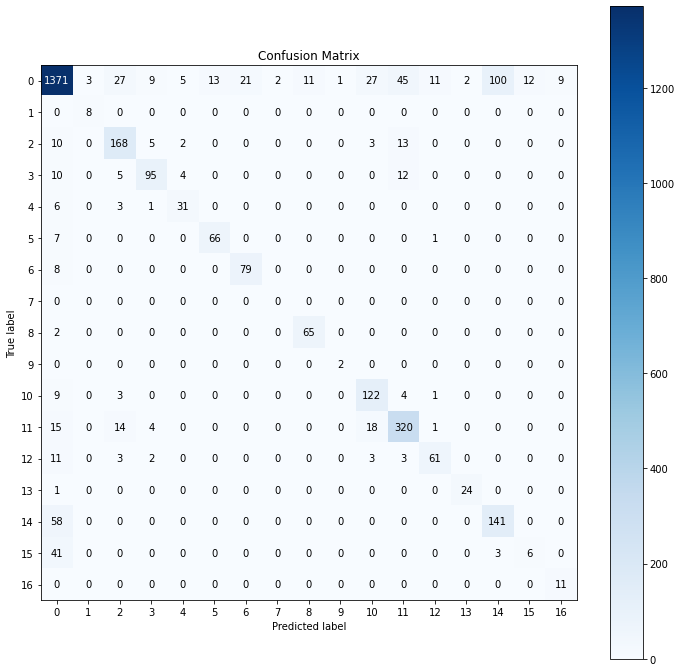

In [111]:
import scikitplot as skplt



skplt.metrics.plot_confusion_matrix(

    y_test,

    y_pred_classes,

    figsize=(12,12))

In [112]:
print('Classification report:\n',classification_report(y_test,y_pred_classes,zero_division=0))

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1669
           1       0.73      1.00      0.84         8
           2       0.75      0.84      0.79       201
           3       0.82      0.75      0.79       126
           4       0.74      0.76      0.75        41
           5       0.84      0.89      0.86        74
           6       0.79      0.91      0.84        87
           7       0.00      0.00      0.00         0
           8       0.86      0.97      0.91        67
           9       0.67      1.00      0.80         2
          10       0.71      0.88      0.78       139
          11       0.81      0.86      0.83       372
          12       0.81      0.73      0.77        83
          13       0.92      0.96      0.94        25
          14       0.58      0.71      0.64       199
          15       0.33      0.12      0.18        50
          16       0.55      1.00      0.71        11

  

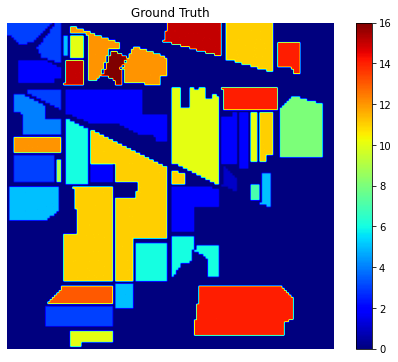

In [113]:
plt.figure(figsize=(8, 6))

plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')

plt.colorbar()

plt.axis('off')

plt.title('Ground Truth')

plt.savefig('ground_truth.png')

plt.show()

In [114]:
from tqdm import tqdm

pre = y_pred_classes



clmap = [0]*X.shape[0]



for i in tqdm(range(len(indices_train))):

    clmap[indices_train[i]] = y[indices_train[i]]



for i in tqdm(range(len(indices_test))):

    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 611653.17it/s]


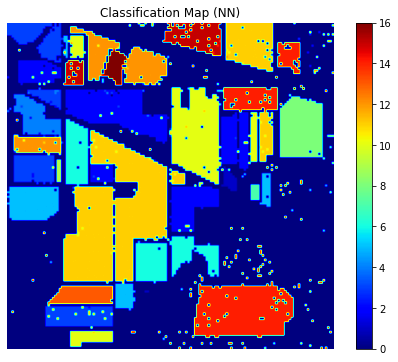

In [115]:
plt.figure(figsize=(8, 6))

plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')

plt.colorbar()

plt.axis('off')

plt.title('Classification Map (NN)')

plt.savefig('Classification_map.png')

plt.show()

In [118]:
X_train.shape

(17871, 50)

# **CNN**


In [239]:
import numpy as np

import scipy.io as sio

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras import layers, models

import tensorflow as tf

import scipy.io as sio


In [240]:


data = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

labels = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [241]:
np.unique(data)

array([ 955,  981,  985, ..., 9279, 9360, 9604], dtype=uint16)

In [242]:


unique_classes = np.unique(labels)

num_classes = len(unique_classes)


In [243]:
num_classes

17

In [244]:
data

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

In [245]:
labels

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [246]:
labels.shape

(145, 145)

In [247]:
# Normalizing the data

data = data.astype(np.float32)

for i in range(data.shape[2]):

    band = data[:, :, i]

    data[:, :, i] = (band - band.min()) / (band.max() - band.min())  # Min-max normalization

data

array([[[3.09716612e-01, 4.72158164e-01, 3.16002935e-01, ...,
         3.82022470e-01, 3.77777785e-01, 7.09090889e-01],
        [1.01214573e-02, 5.13014853e-01, 3.14528018e-01, ...,
         4.21348304e-01, 4.77777779e-01, 7.09090889e-01],
        [5.70344150e-01, 5.13014853e-01, 2.84660757e-01, ...,
         4.04494375e-01, 4.88888890e-01, 6.36363626e-01],
        ...,
        [5.06072864e-03, 3.89126867e-01, 2.47418880e-01, ...,
         2.97752798e-01, 3.88888896e-01, 6.18181825e-01],
        [3.08704466e-01, 4.68204290e-01, 2.47418880e-01, ...,
         3.65168542e-01, 4.22222227e-01, 7.09090889e-01],
        [3.09716612e-01, 3.89126867e-01, 2.45943949e-01, ...,
         3.03370774e-01, 5.33333361e-01, 6.36363626e-01]],

       [[8.09716620e-03, 5.53212523e-01, 2.52581120e-01, ...,
         3.25842708e-01, 4.88888890e-01, 4.54545468e-01],
        [9.46356282e-02, 5.12355864e-01, 3.47713858e-01, ...,
         3.70786518e-01, 5.88888884e-01, 6.18181825e-01],
        [9.61538479e-02, 

In [248]:


patch_size = 9 

In [249]:
patches = []

patch_labels = []

for i in range(margin, data.shape[0] + margin):

    for j in range(margin, data.shape[1] + margin):

        patch = padded_data[i-margin:i+margin+1, j-margin:j+margin+1, :]

        patches.append(patch)

        patch_labels.append(labels[i - margin, j - margin])  # Append label, including 0



patches = np.array(patches)

patch_labels = np.array(patch_labels)


In [250]:


patches=np.array(patches)

patch_labels=np.array(patch_labels)

In [251]:
patch_labels

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

In [252]:
np.unique(patch_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [253]:
# Reshape patches for input to the model

patches = patches.reshape(-1, patch_size, patch_size, data.shape[2], 1)

In [254]:
patches.shape

(21025, 9, 9, 200, 1)

In [255]:
encoder = OneHotEncoder(sparse=False)

labels = patch_labels.reshape(-1, 1)

labels = encoder.fit_transform(labels)

In [256]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [257]:
labels.shape[1]

17

In [258]:
X_train, X_test, y_train, y_test = train_test_split(patches, labels, test_size=0.3, random_state=42)

In [259]:
print("X_train shape:", X_train.shape)

print("X_test shape:", X_test.shape)


X_train shape: (14717, 9, 9, 200, 1)
X_test shape: (6308, 9, 9, 200, 1)


In [260]:
y_train.shape

(14717, 17)

In [262]:
input_shape = (9, 9, 200, 1)

num_classes = labels.shape[1]

In [263]:
num_classes

17

In [302]:
model = models.Sequential()

# First 3D convolutional layer

model.add(layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same', input_shape=input_shape))

model.add(layers.BatchNormalization())

model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))



# Second 3D convolutional layer

model.add(layers.Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'))

model.add(layers.BatchNormalization())

model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))



# Third 3D convolutional layer

model.add(layers.Conv3D(256, kernel_size=(3, 3, 3), activation='relu', padding='same'))

model.add(layers.BatchNormalization())

# Removed MaxPooling3D layer to avoid reducing dimensions too much



# Flatten the output before feeding it to the dense layers

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    

In [303]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_26 (Conv3D)           (None, 9, 9, 200, 64)     1792      
_________________________________________________________________
batch_normalization_30 (Batc (None, 9, 9, 200, 64)     256       
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 4, 4, 100, 64)     0         
_________________________________________________________________
conv3d_27 (Conv3D)           (None, 4, 4, 100, 128)    221312    
_________________________________________________________________
batch_normalization_31 (Batc (None, 4, 4, 100, 128)    512       
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 2, 2, 50, 128)     0         
_________________________________________________________________
conv3d_28 (Conv3D)           (None, 2, 2, 50, 256)   

In [304]:
# Train the model

history=model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

    

Epoch 1/100
230/230 [==============================] - 33s 143ms/step - loss: 2.4640 - accuracy: 0.5242 - val_loss: 53.3995 - val_accuracy: 0.1156
Epoch 2/100
230/230 [==============================] - 32s 139ms/step - loss: 1.7729 - accuracy: 0.5359 - val_loss: 7.0595 - val_accuracy: 0.3182
Epoch 3/100
230/230 [==============================] - 32s 138ms/step - loss: 1.6346 - accuracy: 0.5339 - val_loss: 1.2523 - val_accuracy: 0.5659
Epoch 4/100
230/230 [==============================] - 32s 139ms/step - loss: 1.5241 - accuracy: 0.5381 - val_loss: 1.1962 - val_accuracy: 0.5796
Epoch 5/100
230/230 [==============================] - 32s 139ms/step - loss: 1.4773 - accuracy: 0.5385 - val_loss: 1.1560 - val_accuracy: 0.5924
Epoch 6/100
230/230 [==============================] - 32s 139ms/step - loss: 1.4591 - accuracy: 0.5337 - val_loss: 2.0724 - val_accuracy: 0.5832
Epoch 7/100
230/230 [==============================] - 32s 139ms/step - loss: 1.4073 - accuracy: 0.5423 - val_loss: 1.2361 

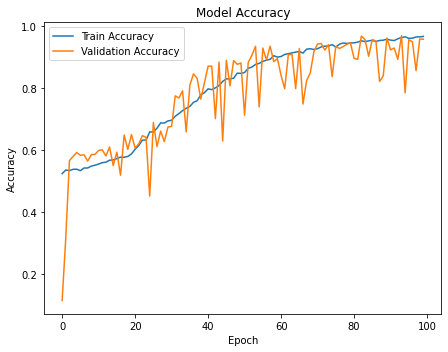

In [305]:
# Plotting training & validation accuracy values

plt.figure(figsize=(12, 5))



plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='Train Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(loc='upper left')



plt.tight_layout()

plt.show()

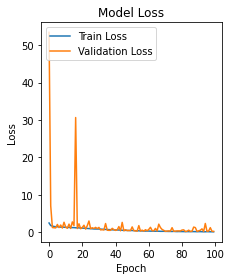

In [306]:


# Plotting training & validation loss values

plt.subplot(1, 2, 2)

plt.plot(history.history['loss'], label='Train Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')

plt.ylabel('Loss')

plt.xlabel('Epoch')

plt.legend(loc='upper left')





plt.tight_layout()

plt.show()

In [307]:
 # Evaluate the model

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy CNN : {test_accuracy:.4f}')


198/198 [==============================] - 4s 20ms/step - loss: 0.2304 - accuracy: 0.9570
Test accuracy CNN : 0.9570


In [308]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [309]:
# Generate predictions

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1) 

y_true = np.argmax(y_test, axis=1)  


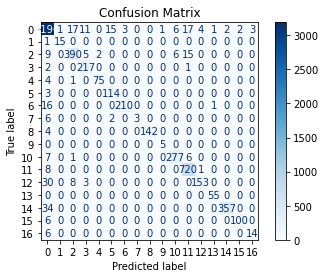

In [310]:
# Confusion Matrix

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))

disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')

plt.show()
